<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Rubén Hernández Guevara | Pablo Alejandro Rivera Sánchez.

**Fecha:** 15 de Marzo del 2021.

**Expediente** : 717710 | 721005.
**Profesor:** Oscar David Jaramillo Zuluaga.

**Link al Repositorio:** https://github.com/Rub27182n/T7-8_HernandezR_RiveraP.git   
    
# Tarea 7: Clase 13

# Tarea 

Aproxime el valor de la siguiente integral usando el método monte carlo crudo y método de reducción de varianza de muestreo estratíficado

$$I=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}\approx 0.33333$$

Pasos
1. Cree una función que realice el método de muestreo estratíficado, recibiendo como único parámetro de entrada la cantidad de estratos y retornando las variables estratíficadas correspondientes.
2. Reporte los resultados de la aproximación de la integral usando montecarlo crudo y muestreo estratíficado, en un Dataframe con la información mostrada en la siguiente imagen:
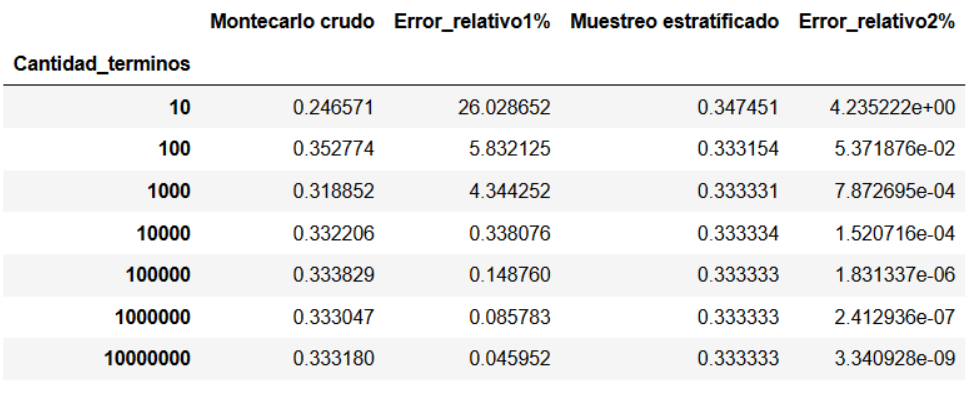

In [1]:
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd

# Solución Rubén

In [2]:
# Integración montecarlo
def int_montecarlo(f:'Función a integrar',
                   a:'Límite inferior',
                   b:'Límite superior',
                   U:'Muestra de números U~[a,b]'):
    return (b-a)/len(U)*np.sum(f(U))

In [3]:
def estratos(a, b, N):
    U2 = np.random.uniform(a,b,N)
    i = np.arange(0,N)
    v = (U2+i)/N
    return v

In [11]:
I = 1/3

a = 0; b = 1

N = np.logspace(1, 7, 7, dtype=int)

df = pd.DataFrame(index = N, columns = ['Montecarlo Crudo', 'Error_relativo1%', 'Muestreo estratificado', 'Error_relativo2%'], dtype='float')
df.index.name = "Cantidad_terminos"

ui = list(map(lambda N:np.random.uniform(a, b, N), N)) #Montecarlo Crudo
ui_est = list(map(lambda N: estratos(a, b ,N), N)) #Estratificado

I_m = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui)) #Montecarlo
I_m_est = list(map(lambda Y:int_montecarlo(lambda x:x**2,a,b,Y),ui_est)) #Estratificado

df.loc[N, "Montecarlo Crudo"] = I_m
df.loc[N, "Error_relativo1%"] = np.abs(df.loc[N, "Montecarlo Crudo"] - I)*100/I

df.loc[N, "Muestreo estratificado"] = I_m_est
df.loc[N, "Error_relativo2%"] = np.abs(df.loc[N, "Muestreo estratificado"]-I)*100/I
df

,Montecarlo Crudo,Error_relativo1%,Muestreo estratificado,Error_relativo2%
Cantidad_terminos,,,,
10,0.189286,43.214228,0.330895,7.314058e-01
100,0.332747,0.175877,0.333508,5.229379e-02
1000,0.334477,0.343204,0.333332,3.979250e-04
10000,0.334178,0.253399,0.333334,5.587614e-05
100000,0.332010,0.396944,0.333333,8.549548e-07
1000000,0.333228,0.031484,0.333333,1.258075e-08
10000000,0.333463,0.038756,0.333333,9.162171e-10


# Solución Pablo